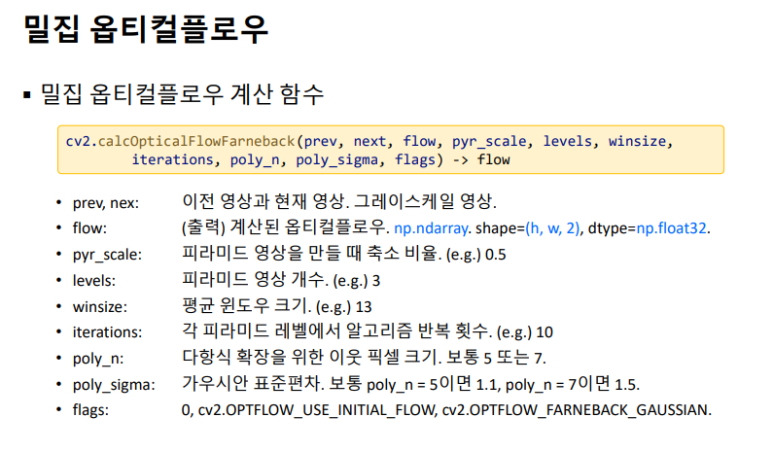
1. 이전프레임
2. 현재 프레임
3. flow는 출력되는 optical flow를 출력  
ndarray에 h,w / 2 세로크기, 가로크기 / x,y 방향성분의 2, 그리고 float32를 쓰지만 None을 줍니다.  
4. 0.5를 줍니다. 
5. 3을 주면 좋습니다.  
6. 13~ 15로,13을 주면 좋습니다.
7. iterations는 10정도
8. 5또는 7을주며 5를 줍니다.
9. 1.1을 주며, poly_n을 7을주면 1.5를 주게 됩니다.
10. 0을 주면 무난합니다. 
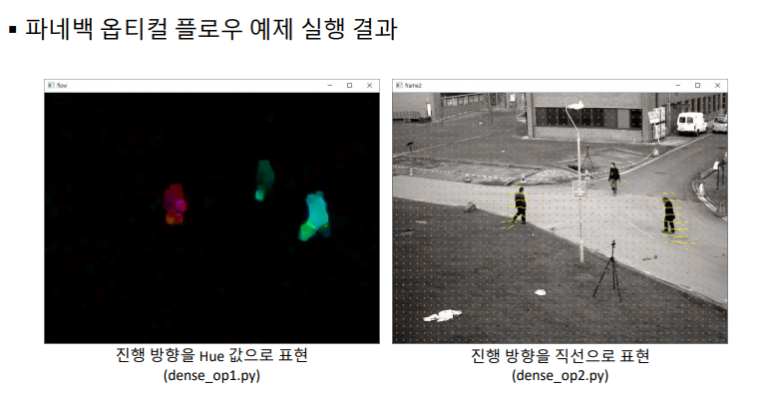

In [1]:
import sys 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import random 
!pip install opencv-python

In [2]:
cap = cv2.VideoCapture("vtest.avi")

In [3]:
if not cap.isOpened():

    print('Camera open failed!')

    sys.exit()


ret, frame1 = cap.read()


if not ret:

    print('frame read failed!')

    sys.exit()


gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

In [4]:
hsv = np.zeros_like(frame1)

In [5]:
hsv[..., 1] = 255

In [6]:
while True:

    ret, frame2 = cap.read()


    if not ret:

        print('frame read failed!')

        sys.exit()


    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 13, 3, 5, 1.1, 0)


    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    #모션벡터 x성분과 모션벡터 y성분을 이용해서 cartToPolar로 극좌표계로 변환해준다. 그 벡터의 크기와 방향으로 리턴을 해준다.

    hsv[..., 0] = ang*180/np.pi/2 #ang로 H값 지정

    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)#mag로 V값 지정


    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    #그 결과를 bgr로 반환.

    cv2.imshow('frame', frame2)

    cv2.imshow('flow', bgr)

    if cv2.waitKey(20) == 27:

        break


    gray1 = gray2


cv2.destroyAllWindows()